# Analysis of Patterns and External Factors

# Table of Contents

1. [Introduction](#introduction)
2. [Objectives](#objectives)
3. [Library Import](#library-import)
4. [Import the CSV Files](#import-the-csv-files)
5. [Investigate the Contained Information](#investigate-the-contained-information)
6. [Correct and Verify the Various Data Types](#correct-and-verify-the-various-data-types)
7. [Identify the Top 10 Neighborhoods in Terms of Trip Endings](#identify-the-top-10-neighborhoods-in-terms-of-trip-endings)
8. [Extract Conclusions Based on the Graphs](#extract-conclusions-based-on-the-graphs)
9. [Hypothesis Test](#hypothesis-test)
   - [Hypothesis Statement](#hypothesis-statement)
10. [General Conclusions](#general-conclusions)

## Introduction

In this Project, we'll be working as investigators for Zuber, a recently propelled ride-sharing company in Chicago. Our errand will be to analyze accessible information to distinguish designs, get it traveler inclinations, and survey the affect of external components on ride recurrence. We'll be working with a database that incorporates information from competitors and testing a theory with respect to the impact of climate conditions on the recurrence of rides. By the conclusion of this venture, we point to draw important bits of knowledge that will offer assistance Zuber make data-driven choices 

## Objectives

1. **Perform Information Investigation:**  
   We are going to investigate the information to distinguish designs and patterns, centering on ride recurrence over distinctive companies and neighborhoods.

2. **Analyze Climate Affect:**  
   We'll test the speculation that climate conditions, particularly stormy Saturdays, impact the term of rides from the Loop to O'Hare Airport.

3. **Visualize Key Insights:**  
   We are going to make enlightening visualizations to speak to the relationship between ride information, taxi companies, and neighborhood information, highlighting zones of intrigued.


## Library Import

In [1]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Import the CSV Files:
Load the data from the files /datasets/project_sql_result_01.csv and /datasets/project_sql_result_04.csv into an analysis environment (Python).

In [3]:
# Import all datasets
df_companies = pd.read_csv("moved_project_sql_result_01.csv")
df_trips = pd.read_csv("moved_project_sql_result_04.csv")
df_climate = pd.read_csv("moved_project_sql_result_07.csv")

## Investigate the Contained Information:

Evaluate and understand the structure and content of each file, including identifying the columns, reviewing the first few rows of the data, and understanding the nature of the data.

In [4]:
# Preliminary Data Analysis
df_companies.info()
print()

print(df_companies.describe())
print()

print(df_companies.head())
print()

# Check for duplicates
duplicados = df_companies.duplicated().sum() 
print(f'Total number of duplicate rows: {duplicados}')

# Check for missing values
nulos_total = df_companies.isnull().sum().sum()
print(f'Total number of missing values in the DataFrame: {nulos_total}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Total number of duplicate rows: 0
Total number of missing values in the DataFrame: 0


## Correct and Verify the Various Data Types:

Perform the necessary conversions to ensure the accuracy of subsequent analysis and make sure that the data types in each column are correct.

In [6]:
# Preliminary data analysis
df_trips.info()
print(df_trips.describe())
print()
print(df_trips.head())
print()
duplicados = df_trips.duplicated().sum()  # checking duplicates
print(f'Total number of duplicate rows: {duplicados}')
nulos_total = df_trips.isnull().sum().sum()
print(f'Total number of null values in the DataFrame: {nulos_total}')  # Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Total number of duplicate rows: 0
Total number of null values in the DataFrame: 0


In [7]:
# Preliminary data analysis
df_climate.info()
print(df_climate.describe())
print()
print(df_climate.head())
print()
drop = df_climate.drop_duplicates()
duplicados = drop.duplicated().sum()  # Checking duplicates
print(f'Total number of duplicate rows: {duplicados}')
nulos_total = df_climate.isnull().sum().sum()
print(f'Total number of null values in the DataFrame: {nulos_total}')  # Checking for null values

df_sin_duplicados = df_climate.drop_duplicates()  # Removing duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Total number of du

## Identify the Top 10 Neighborhoods in Terms of Trip Endings:

Analyze the data from the file /datasets/project_sql_result_04.csv to identify the 10 neighborhoods in Chicago with the highest number of trip endings.

In [9]:
# Identifying top neighborhoods
top_10 = df_trips.sort_values(by='average_trips', ascending=False).head(10)

print(top_10.head())


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


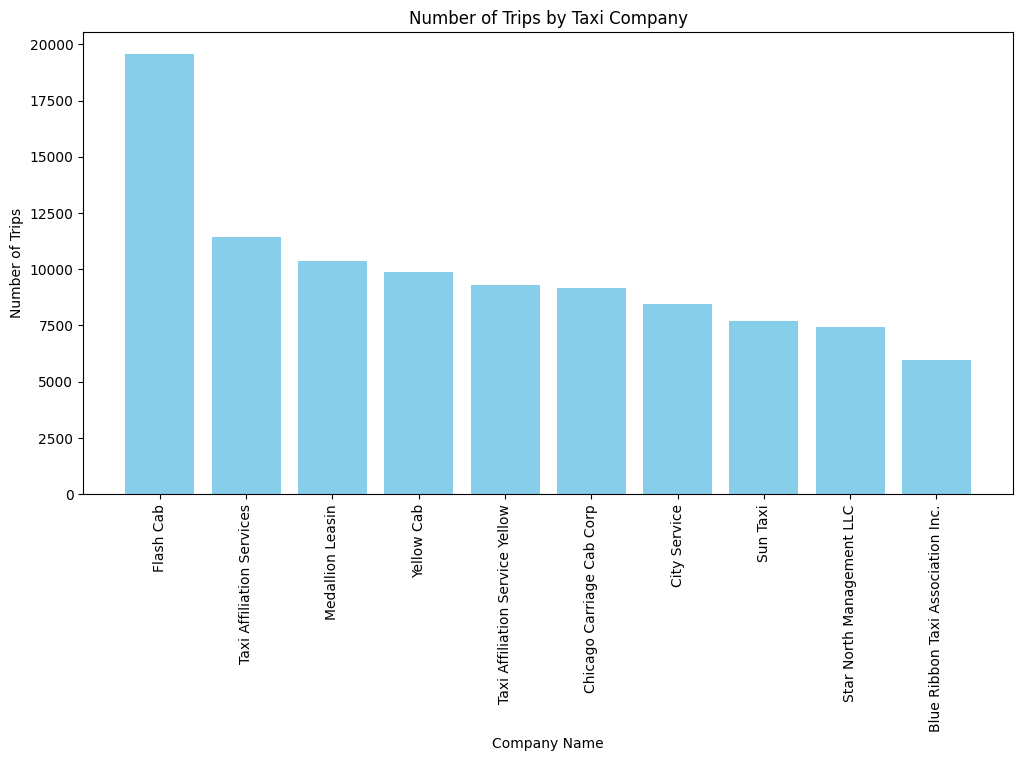

In [10]:
# Filter the top 10 results
df_top_10 = df_companies.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_top_10['company_name'], df_top_10['trips_amount'], color='skyblue')
plt.xlabel('Company Name')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Taxi Company')
plt.xticks(rotation=90)
plt.show()

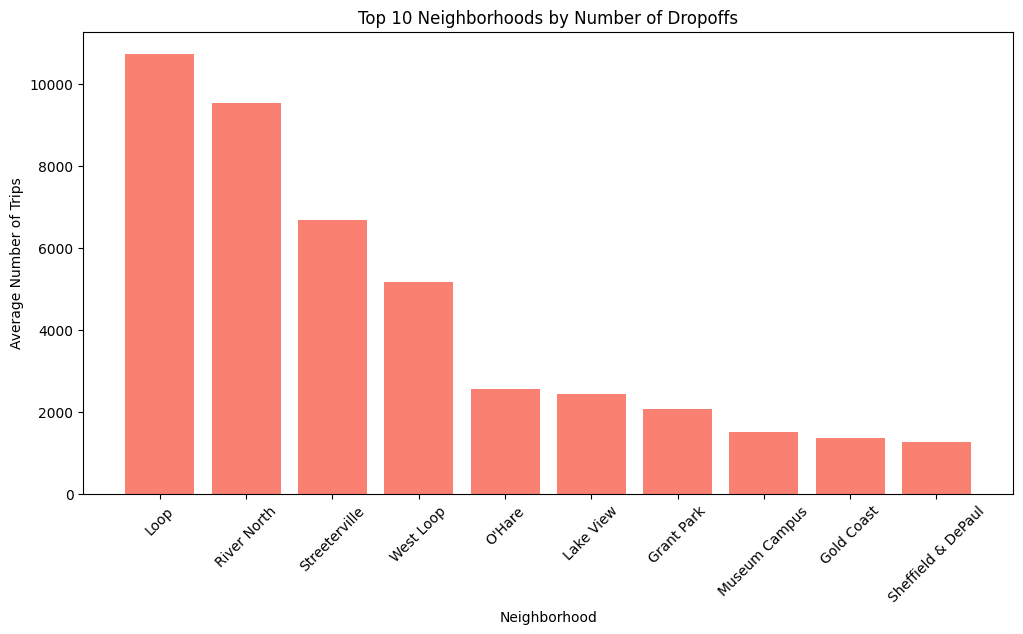

In [11]:
# Chart 2: Top 10 neighborhoods by number of dropoffs
plt.figure(figsize=(12, 6))
plt.bar(top_10['dropoff_location_name'], top_10['average_trips'], color='salmon')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Trips')
plt.title('Top 10 Neighborhoods by Number of Dropoffs')
plt.xticks(rotation=45)
plt.show()

## Extract Conclusions Based on the Graphs:

Interpret the results displayed in the graphs, identify significant patterns or trends, and explain the implications of these findings in the context of the taxi ride analysis in Chicago.

**Graph #1**  
It can be observed that the market is dominated by a few companies. Considering the number of companies that exist, it can be concluded that Flash Cab is the market leader, leaving fewer opportunities for smaller companies. This suggests that the market is highly concentrated in a few companies that dominate the number of rides. Smaller companies can devise strategies to expand their coverage into areas where supply is lower.

**Graph #2**  
The neighborhoods of Loop and River North have the highest demand for services, far above the others. Companies with less influence in the city could take advantage of this lower demand to expand their offering and start growing, to narrow the gap with big players like Flash Cab, which are dominating the market. Neighborhoods like West Loop or Lakeview could be considered to create new sales strategies, as areas like the Loop are highly competitive.


## Hypothesis Test  
We will use a third CSV file:  

/datasets/project_sql_result_07.csv: It includes data on trips from the Loop to O'Hare International Airport, specifying the pickup date and time, weather conditions at the start of the trip, and the duration of the trip in seconds.


### Hypothesis Statement
"The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays."  
This will be our null hypothesis, as it suggests that the average durations on rainy Saturdays and other days are the same.

In [12]:
# Hypothesis
# Convert 'start_ts' to datetime type
df_climate['start_ts'] = pd.to_datetime(df_climate['start_ts'])

# Extract the day of the week (Saturday)
df_climate['day_of_week'] = df_climate['start_ts'].dt.dayofweek

# Filter data for rainy Saturdays and other days
saturdays_rainy = df_climate[(df_climate['day_of_week'] == 5) & (df_climate['weather_conditions'] == 'Bad')]
other_days = df_climate[~((df_climate['day_of_week'] == 5) & (df_climate['weather_conditions'] == 'Bad'))]

# Duration in seconds for each group
saturdays_rainy_durations = saturdays_rainy['duration_seconds']
other_days_durations = other_days['duration_seconds']

# Perform Levene's test for equality of variances
stat_levene, p_value_levene = stats.levene(saturdays_rainy_durations, other_days_durations)

print(f"Levene test statistic: {stat_levene}")
print(f"Levene test p-value: {p_value_levene}")

# Determine whether to assume equal or different variances
equal_var = p_value_levene > 0.05  # If p > 0.05, we assume equal variances

print(f"Assuming equal variances: {equal_var}")

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(saturdays_rainy_durations, other_days_durations, equal_var=equal_var)

# Significance level
alpha = 0.05

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Do not reject the null hypothesis")

Levene test statistic: 0.38853489683656073
Levene test p-value: 0.5332038671974493
Assuming equal variances: True
t-statistic: 6.946177714041499
p-value: 6.517970327099473e-12
Reject the null hypothesis


The null hypothesis is rejected, which implies that, compared to other days, trips from the Loop to O'Hare International Airport last much longer on rainy Saturdays. This could mean that rainy conditions have a significant impact on the duration of trips on these particular days.

## General Conclusions

Libraries such as Pandas were used to process the datasets, and stats were employed to handle statistical hypotheses. The hypothesis, combined with the results from the companies with the highest demand and the neighborhoods with the most frequent trips, is useful for better planning and analyzing future business strategies. It is clear that a large portion of the market is dominated by Flash Cab, and the neighborhood with the highest demand is Loop. Additionally, it is known that rainy days delay the completion of trips. With this data, a better understanding of the dynamics of trips in the city can be achieved.